# TP1 du module 4 : le travail sur les données.

Dans ce TP, nous allons explorer plus en détails le jeu de données du Titanic. Objectifs :
* Analyser des statistiques pour décrire les données
* Produire des visualisations pertinentes pour la compréhesion des données.
* Nettoyer le jeu de données
* Préparer les données pour qu'elles soient prêtes à être fournies à un algorithme d'apprentissage.

In [1]:
# Ajoutez ici les imports de librairies nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

import sklearn

Commencez par recharger le jeu de données depuis un csv dans un dataframe Pandas. Rappel de l'adresse à laquelle vous pouvez le trouver : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

## Exploration du jeu de données

Commencez par répondre au question suivante. Prenez le temps de bien analyser vos réponses, afin de mieux vous familiariser avec le contenu du jeu de données.

1. Combien de données dans le jeu de données Titanic ?

In [3]:
print("Nombre de données : ", len(titanic))

Nombre de données :  891


2. Combien d'attributs compte le jeu de données ?

In [4]:
print("Nombre d'attributs : ", len(titanic.columns))

Nombre d'attributs :  12


3. Identifiez quelles colonnes contiennent des données discrètes, et lesquelles contiennent des données continues.

In [5]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**Réponse :** 

* Données discrètes : PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch, Cabin, Embarked
* Données continues : Age, Fare, Ticket

4. De la même manière, identifiez les colonnes de données qualitatives, et celles de données quantitatives.

**Réponse :** 

* Données qualitatives : Survived, Name, Sex, Ticket, Cabin, Embarked
* Données quantitatives : PassengerId, Pclass, Age, SibSp, Parch, Fare

5. Affichez les statistiques de base sur les colonnes quantitatives du dataset. 
Quelles informations pouvez-vous en retirer ? Pour chaque attribut, cherchez au moins une information pertinente que vous pouvez déduire de vos observations.

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations sur les statistiques :** 
* Il y a malheureusement eu plus de personnes ayant péri que de survivants. La proportion est d'environ 1/3 de survivants.
* Il semble y avoir eu une majorité (plus de la moitié) de voyageurs en 3e classe.
* Les âges sont très variés, avec un pic autour de la trentaine.
* Une majorité de passagers voyageaient sans frère, soeur ou conjoint à bord
* De même, peu de passagers voyageaient avec des parents ou des enfants.
* Les prix des tickets semblent très variables, avec une majorité de prix assez faibles et éloignés du prix maximum. Cela est cohérent avec la majorité de voyageurs en 3e classe.

6. Sur une figure avec 6 sous-figures, proposez un histogramme pour visualiser la répartition des valeurs sur les attributs suivants : Survived, Pclass, Sex, Embarked, Age, Fare. Pour chaque figure, quelle(s) observation(s) pouvez-vous faire ?

/home/quentin-eni/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/quentin-eni/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/quentin-eni/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/quentin-eni/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='Fare', ylabel='Count'>

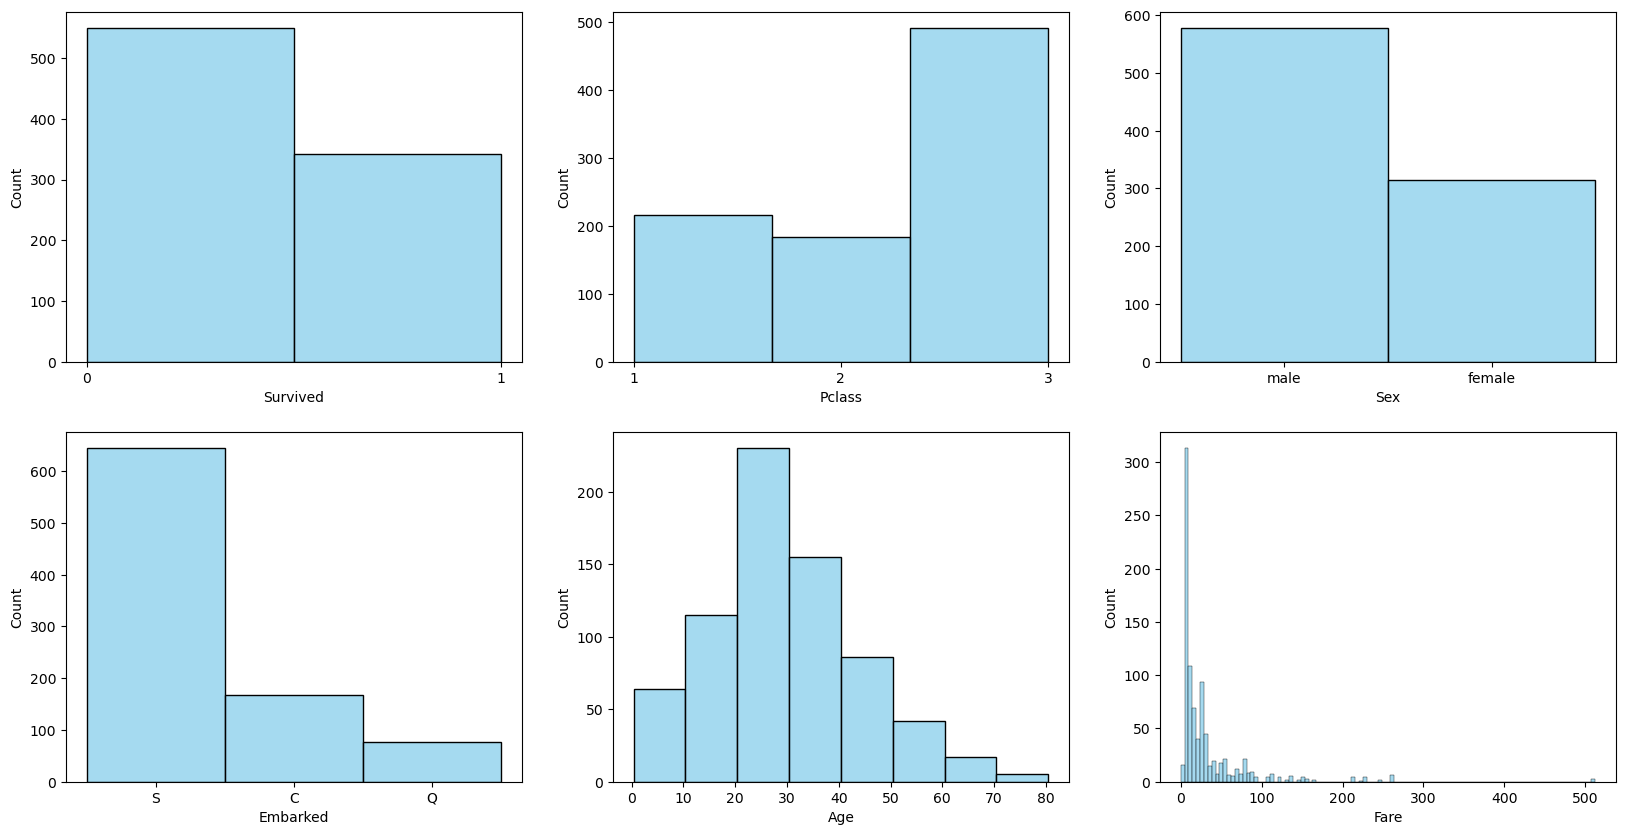

In [7]:
f, axes = plt.subplots(2, 3, figsize=(20, 10))
    
# Histogramme pour la survie
sub1 = axes[0, 0]
sns.histplot(titanic['Survived'] , color="skyblue", ax=sub1, bins=2)
sub1.set_xticks([0,1])

# Histogramme pour la classe des passagers
sub1 = axes[0, 1]
sns.histplot(titanic['Pclass'] , color="skyblue", ax=sub1, bins=3)
sub1.set_xticks([1,2,3])

# Histogramme pour le genre des passagers
sub1 = axes[0, 2]
sns.histplot(titanic['Sex'] , color="skyblue", ax=sub1, bins=2)

# Histogramme pour le port d'embarquement
sub1 = axes[1, 0]
sns.histplot(titanic['Embarked'] , color="skyblue", ax=sub1)

# Histogramme pour l'âge des passagers, regroupés par dizaine
sub1 = axes[1, 1]
sns.histplot(titanic['Age'] , color="skyblue", ax=sub1, binwidth=10)

# Histogramme pour le prix du billet
sub1 = axes[1, 2]
sns.histplot(titanic['Fare'] , color="skyblue", ax=sub1)

**Observations :**
* Plus de décès que de survivants
* Majorité de personnes en 3e classe
* Plus d'hommes que de femmes
* Grande majorité de personnes ayant embarqué à Southampton
* Ages très répartis, pic autour de la trentaine (corrobore les statistiques)
* Beaucoup de billets à bas prix, valeurs très étalées.

7. Sur un même graphique, représentez, pour chaque genre, le nombre de personnes ayant survécu. Que pouvez-vous en déduire ? Le genre d'un passager vous parait-il pertinent pour qu'un modèle d'apprentissage puisse prédire si ce passager a survécu ?

AttributeError: 'numpy.int64' object has no attribute 'startswith'

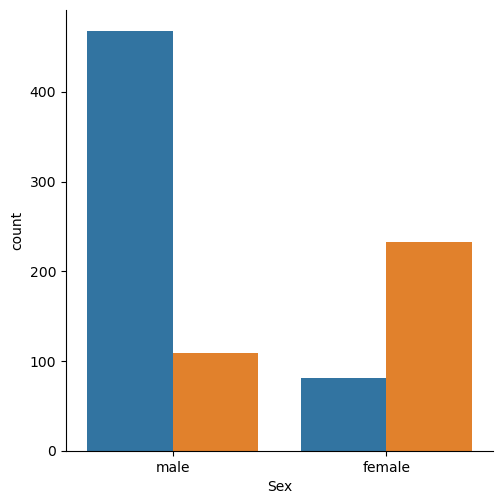

In [8]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = titanic)

**Observation :** Il y avait plus d'hommes que de femmes à bord du bateau, mais les femmes ont été plus nombreuses à survivre. Ainsi, si la majorité des hommes ont péri, chez les femmes la tendance est inversée. Le genre est donc un attribut très pertinent pour prédire la survie ou non, car très discriminant. Il ne sera pas suffisant, mais pourra améliorer la prédiction s'il est combiné à d'autres attributs.

8. En vous basant sur une visualisation, observez-vous une corrélation entre certains attributs ? Que pouvez-vous en déduire pour un futur modèle d'apprentissage ?

In [9]:
sns.heatmap(titanic.corr())

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

**Observations :**
* Corrélation entre SibSp et Parch, ce qui est logique étant donné qu'ils sont tous les deux relatifs à la notion de famille
* Corrélation entre la survie et la classe des passagers : très intéressant pour l'apprentissage
* Corrélation entre l'âge et la classe des passagers

9. En vous basant sur vos observations de la visualisation précédente, confirmez vos impressions en proposant deux visualisations. Par exemple, si vous avez observé une corrélation entre un attribut A et un attribut B, mettez en valeur le fait que les mêmes valeurs de A sont souvent trouvées avec les mêmes valeurs de B. 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

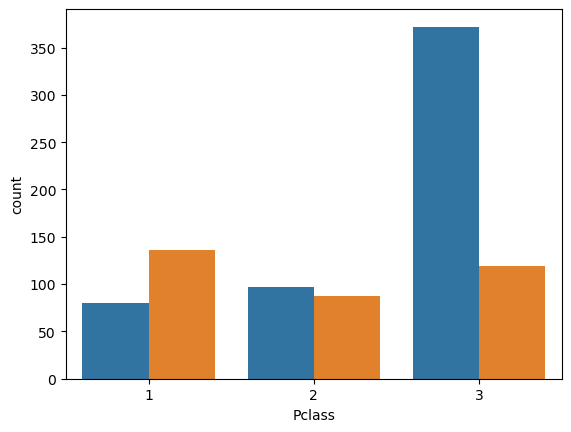

In [10]:
# Proposition 1 : survie et classe des passagers
sns.countplot(data=titanic, x='Pclass',hue='Survived')

**Observation :** les passagers de classe plus élevée ont eu plus de chance de survie.

/home/quentin-eni/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

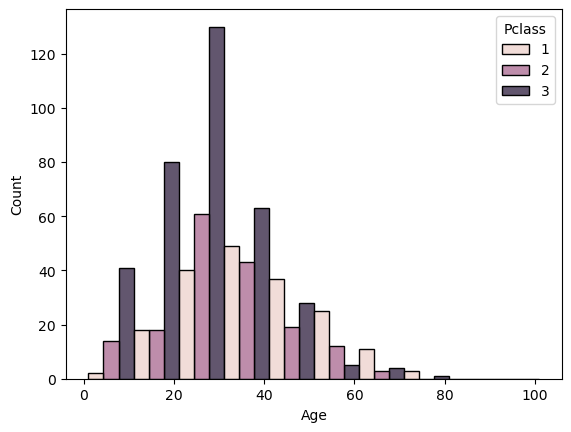

In [11]:
# Proposition 2 : âge et classe des passagers
sns.histplot(
    data=titanic, x='Age', hue='Pclass', multiple='dodge',
    bins=range(1, 110, 10))

**Observation :** les passagers plus âgées sont souvent dans des classes plus élevées.

10. Mettez-vous à présent dans le rôle d'un data analyst face à un nouveau jeu de données : quelles autres visualisations vous paraissent nécessaires ? Proposez au moins trois visualisations qui vous semblent pertinentes. Gardez en tête que l'objectif sur ce jeu de données sera de réussir à prédire si un passager à survécu ou non.

**Suggestions de visualisations :**
* Survie par classe d'âge
* Survie et nombre de membres de la famille
* Age et prix du ticket

## Nettoyage des données
1. Pour chaque colonne, comptez le nombre de valeurs nulles.

In [12]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Traitement du port d'embarquement

2. Les valeurs manquantes du port d'embarquement sont très peu nombreuses. De plus, s'agissant d'un attribut discret, nous pouvons considérer l'information de valeur nulle comme une valeur possible supplémentaire. Commencer par affichez les lignes pour lesquelles le port d'embarquement n'est pas renseigné.

In [13]:
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


3. Remplacez ces valeurs nulles par la valeur 'U' (pour unknown). Vérifiez vos résultats en réaffichant les lignes obtenues ci-dessus :

In [14]:
titanic['Embarked'] = titanic['Embarked'].replace(np.nan, 'U')
titanic[(titanic['PassengerId']==62) | (titanic['PassengerId']==830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,U
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,U


### Traitement du numéro de cabine

4. Le numéro de cabine est l'attribut qui contient le plus de valeurs nulles. Cet attribut n'a pas de lien évident avec la survie des passagers. Supprimer cette colonne dans votre dataframe.

In [15]:
titanic = titanic.drop('Cabin', axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Traitement de l'âge
5. L'âge est un attribut plus délicat à traiter : il contient un nombre conséquent de valeur nulle, mais il est très pertinent à prendre en compte pour la prédiction de la survie d'un passager, ces deux informations étant assez fortement corrélées. Il existe plein de stratégies pour remplacer ces valeurs manquantes :
* Mettre une valeur aléatoire '(tirée entre le min et le max)
* Remplacer par la moyenne
* Remplacer par une valeur déterminée en fonction des autres paramètres (classe, age, etc)

Commencer par calculer pour chaque genre et pour chaque classe, l'âge moyen (6 valeurs à obtenir au total).

In [16]:
age_avg_pclass_sex = titanic.groupby(['Pclass', 'Sex'], as_index=False)['Age'].mean()
print(age_avg_pclass_sex)

   Pclass     Sex        Age
0       1  female  34.611765
1       1    male  41.281386
2       2  female  28.722973
3       2    male  30.740707
4       3  female  21.750000
5       3    male  26.507589


6. Pour chaque ligne du jeu de données, si l'âge est manquant, remplacez la valeur nulle par une des valeurs calculées ci-dessus. basez-vous sur le genre et la classe du passager pour choisir la bonne valeur. 

In [17]:
titanic['Age'] = titanic['Age'].groupby([titanic['Pclass'], titanic['Sex']]).apply(lambda x: x.fillna(x.mean()))
titanic

TypeError: incompatible index of inserted column with frame index

## Préparer les données

Nous entrons dans la dernière phase de traitement des données : nous allons terminer des les mettre en forme, pour qu'elles soient prêtes à être manipulées dans un processus d'apprentissage.

# Encodage des données catégorielles

1. Réaffichez les infos sur le jeu de données. Vous devez avoir 11 colonnes, toutes remplies avec 891 valeurs.

In [ ]:
titanic.info()

2. Trois colonnes sont liées à l'identification unique d'un passager, et ne sont pas pertinentes pour la prédiction de la survie. Supprimez ces trois colonnes de votre jeu de données.

In [ ]:
titanic = titanic.drop(['PassengerId','Name', 'Ticket'], axis=1)
titanic.info()

3. Reproduisez une manipulation vue au module 3 : combinez deux colonnes relatives aux familles de passagers pour n'en faire plus qu'une. Pensez à supprimer les deux anciennes colonnes.

In [ ]:
titanic['Famille'] = titanic['SibSp'] + titanic['Parch']
titanic = titanic.drop(['SibSp','Parch'], axis=1)
titanic.info()

4. Parmi les colonnes restantes, sur lesquelles un encodage one-hot vous semble pertinent ? En vous appuyant sur [la documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), appliquez cet encodage aux colonnes identifiées. Enfin, pensez à supprimer les anciennes colonnes.

Note : pour le genre, il n'y a que deux possibilités dans ce jeu de données. Avec l'option `if_binary` de l'encodeur, vous pouvez ne générer qu'une seule colonne (l'autre s'obtenant immédiatement par déduction).

In [ ]:
enc = OneHotEncoder(drop='if_binary')

one_hot = np.array(enc.fit_transform(titanic[['Sex', 'Embarked']]).toarray())
one_hot_label = enc.get_feature_names_out(['Sex', 'Embarked'])

df = pd.DataFrame(data=one_hot, columns=one_hot_label)
titanic = titanic.join(df)
titanic = titanic.drop(['Sex', 'Embarked'], axis=1)


titanic.info()

5. Vous devez à présent avoir un jeu de données sur 10 attributs, tous numériques (`int64` ou `float64`), sans aucune valeur nulle. Enregistrer ce jeu de données au format csv, afin de pouvoir le réutiliser par la suite. Il est inutile de sauvegarder l'index présent dans le dataframe.

In [ ]:
titanic.to_csv('Titanic.csv', index=False)

# Fin du TP !